# CNVisualize Tutorial

## 1. Introduction

A tool to plot number of reads in small windows for multiple samples as a heatmap, for single-cell RNA-seq data. These heatmaps would be helpful to find some patterns of CNVs.

For example, the heatmap will indicate the number of reads in each small binned windows in the whole genome, then it would be clear to see which windows contain significantly less reads, and then it might indicate there there is a potential CNV in that region.

The tool takes split single-cell RNA-seq bam files, a list of barcodes, reference genome chromosome sizes, and the window size for binnig as input, and the output would be a heatmap contains the number of reads values for each cell sample.

## 2. Goal

The goal of this tutorial is run the CNVisualize package on the test sample dataset, which will generate the original number of reads count dataframe for each cell in each small window, as well as the normalized dataframe for plotting the heatmap. Finally, the heatmap will be generated at the end of this tutorial.

## 3. Example Data

The example data that will be used in this tutorial is a subset of the whole data, it will only have two cells, the cooresponding barcode list is given in `CNVisualize/data/sample_barcodes_test.txt`. The whole dataset have 20 cells, the bam files (`.bam`) and their corresponding bam index files (`.bai`) are available at [https://www.dropbox.com/sh/ke5s2w7gb96m09g/AACM1vP24MTBQDFTNwUgjlWJa?dl=0].

## 4. Pipeline

After installing the `CNVisualize` package, we are able to run the analysis pipline as follows:

(1) import some essential packages and also the `CNVisualize` package.

In [7]:
import os
import pandas as pd
import CNVisualize.count as c
import CNVisualize.heatmap as heatmap

(2) If you do not have `samtools` installed in your current environment, run this code cell to install it. You may need to restart the kernel after the installation completing.

In [ ]:
# If you do not have samtools installed in your current environment.
os.popen("conda install -c bioconda samtools")

(3) Prepare the input files and initialize the input parameters.

In [8]:
bam_path = "./../data/sorted_split_bams/"
barcode_path = "./../data/sample_barcodes_test.txt"
chrom_size_path = "./../data/hg19.chrom.sizes"
window_size = int(5e6)
out_dir = "./output/df_test.csv"

(4) Run the analysis as follows, the two dataframe files will be stored in the given directory, and the heatmap will be shown in this part.

INFO 2023-04-09 19:19:50,110 CNVisualize.count    Arguments:
bampath : /Users/shaomiao/Desktop/BIOINF576/CNVisualize/data/sorted_split_bams
bc_file : /Users/shaomiao/Desktop/BIOINF576/CNVisualize/data/sample_barcodes_test.txt
chrom_size : /Users/shaomiao/Desktop/BIOINF576/CNVisualize/data/hg19.chrom.sizes
window_size : 5000000
rundir : /Users/shaomiao/Desktop/BIOINF576/CNVisualize/tutorial/output/df_test.csv
INFO 2023-04-09 19:19:50,113 CNVisualize.count    Start TGTGGTATCGATAGGG-1_B11
INFO 2023-04-09 19:20:25,779 CNVisualize.count    Start TGCGGGTCATTCAGTG-1_B11
INFO 2023-04-09 19:21:00,924 CNVisualize.count    Dataframe generated in /Users/shaomiao/Desktop/BIOINF576/CNVisualize/tutorial/output/df_test.csv
INFO 2023-04-09 19:21:01,011 CNVisualize.count    Dataframe normalized


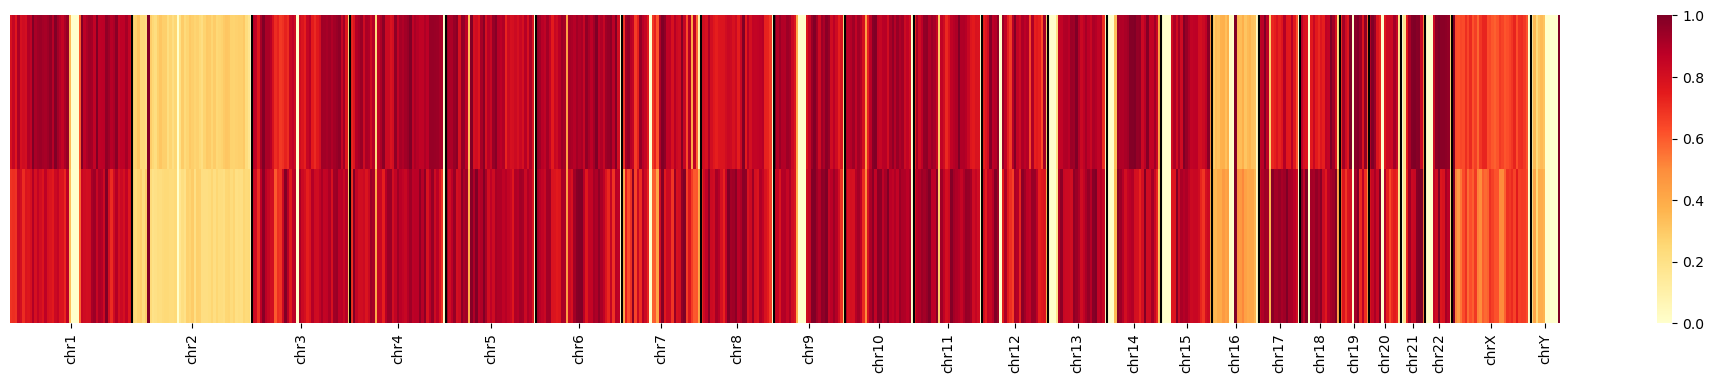

In [9]:
df_norm = c.count(bam_path, barcode_path, chrom_size_path, window_size, out_dir)
chrom_size_dict = c.read_chrom_size(chrom_size_path)
_, windows_count = c.window_indices(window_size, chrom_size_dict)

fig = heatmap.heatmap(df_norm.iloc[:, 1:], windows_count)

## 5. Conclusion

By looking at the heatmap generated above, we can see the number of reads in each small windows of each cell in a straightforward way, we can increase the sample size and change the window size to explore the potential CNVs among the samples. Possible CNV sites will have horizontal lighter color blocks in the heatmap. 